In [2]:
import numpy as np
import pandas as pd

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol


Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [3]:
data = pd.read_csv('winequality-red.csv')

In [4]:
data.shape

(1599, 12)

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
X, y = data.iloc[:,:11], data.iloc[:,11:]

In [9]:
X.shape[1]

11

In [26]:
y.shape

(1599, 1)

In [11]:
class Layer_Dense :
    def __init__(self,n_inputs,n_neurons):
        self.Weights = 0.10 * np.random.randn(n_inputs,n_neurons)
        self.Biases = np.zeros((1,n_neurons))
    def forward(self,inputs) :
        self.output = np.dot(inputs,self.Weights) + self.Biases

In [12]:
class Activation_ReLU :
    def forward(self,inputs) :
        self.output = np.maximum(0,inputs)

In [13]:
class Activation_Softmax :
    def forward(self,inputs) :
        exp_values = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
        self.output = probabilities

In [14]:
class Loss :
    def calculate(self, output, y) :
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss

In [59]:
class LCC(Loss) :
    def forward(self,y_pred,y_true) :
        samples = len(y_pred)
        y_pred_cliped = np.clip(y_pred,1e-4,1-1e-4)
        correct_confidence = 0
        if len(y_true.shape) == 1 :
            correct_confidence = y_pred_cliped[range(samples),y_true]
        else :
            correct_confindence = np.sum(y_pred_cliped*y_true,axis=1)
            
        negative_log_likelyhoods = -np.log(correct_confidence)
        
        return negative_log_likelyhoods

In [70]:
layer1 = Layer_Dense(X.shape[1],X.shape[1]+1)
layer2 = Layer_Dense(12,12)
layer3 = Layer_Dense(12,12)
layer4 = Layer_Dense(12,12)
layer5 = Layer_Dense(12,12)
layer6 = Layer_Dense(12,12)
layer7 = Layer_Dense(12,12)
layer8 = Layer_Dense(12,12)
layer9 = Layer_Dense(12,12)
layer10 = Layer_Dense(12,12)
layer11 = Layer_Dense(12,12)
layer12 = Layer_Dense(12,12)
layer13 = Layer_Dense(12,12)
layer14 = Layer_Dense(12,12)
layer15 = Layer_Dense(12,12)
OutputLayer = Layer_Dense(12,1)

activation1 = Activation_ReLU()
activation2 = Activation_ReLU()
activation3 = Activation_ReLU()
activation4 = Activation_ReLU()
activation5 = Activation_ReLU()
activation6 = Activation_ReLU()
activation7 = Activation_ReLU()
activation8 = Activation_ReLU()
activation9 = Activation_ReLU()
activation10 = Activation_ReLU()
activation11 = Activation_ReLU()
activation12 = Activation_ReLU()
activation13 = Activation_ReLU()
activation14 = Activation_ReLU()
activation15 = Activation_ReLU()

In [87]:
epoch = 10
for i in range(epoch) :
    layer1.forward(X)
    activation1.forward(layer1.output)

    layer2.forward(activation1.output)
    activation2.forward(layer2.output)

    layer3.forward(activation2.output)
    activation3.forward(layer3.output)

    layer4.forward(activation3.output)
    activation4.forward(layer4.output)

    layer5.forward(activation4.output)
    activation5.forward(layer5.output)

    layer6.forward(activation5.output)
    activation6.forward(layer6.output)

    layer7.forward(activation6.output)
    activation7.forward(layer7.output)

    layer8.forward(activation7.output)
    activation8.forward(layer8.output)

    layer9.forward(activation8.output)
    activation9.forward(layer9.output)

    layer10.forward(activation9.output)
    activation10.forward(layer10.output)

    layer11.forward(activation10.output)
    activation11.forward(layer11.output)

    layer12.forward(activation11.output)
    activation12.forward(layer12.output)

    layer13.forward(activation12.output)
    activation13.forward(layer13.output)

    layer14.forward(activation13.output)
    activation14.forward(layer14.output)

    layer15.forward(activation14.output)
    activation15.forward(layer15.output)

###### for 2 layers

In [88]:
OutputLayer.forward(activation2.output)
OutputLayer.output

array([[0.05913517],
       [0.14879864],
       [0.11838634],
       ...,
       [0.07331274],
       [0.0866256 ],
       [0.07733001]])

###### for 8 layers

In [89]:
OutputLayer.forward(activation8.output)
OutputLayer.output

array([[-2.51084065e-05],
       [-5.32488597e-05],
       [-4.49298304e-05],
       ...,
       [-1.52154262e-05],
       [-1.82484006e-05],
       [-1.92371983e-05]])

###### for 15 layers

In [90]:
OutputLayer.forward(activation15.output)
OutputLayer.output

array([[-7.62947238e-10],
       [-1.55276056e-09],
       [-1.29933517e-09],
       ...,
       [ 3.46660729e-11],
       [ 2.63222347e-11],
       [-2.16451721e-10]])

In [81]:
OutputLayer.output.shape

(1599, 1)

In [82]:
y.shape

(1599, 1)

In [83]:
loss_fun = LCC()
loss = loss_fun.calculate(OutputLayer.output,y)

/tmp/ipykernel_91847/1293656013.py:11: RuntimeWarning: divide by zero encountered in log
  negative_log_likelyhoods = -np.log(correct_confidence)


In [84]:
loss

inf

In [1]:
import matplotlib.pyplot as plt

In [4]:
class Plot:
    def plot(self,count,loss) :
        plt.plot(count,loss, 'b-')
        plt.legend(['Training Loss', 'Test Loss'])
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show();

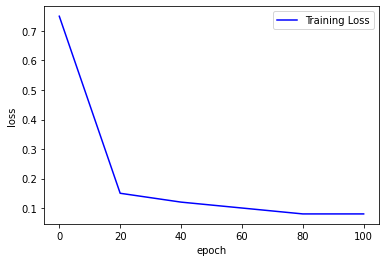

In [5]:
p = Plot();
p.plot(Epoch,loss)

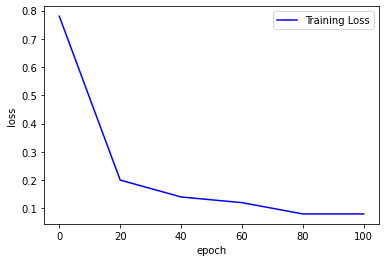

In [7]:
p = Plot();
p.plot(Epoch,loss)

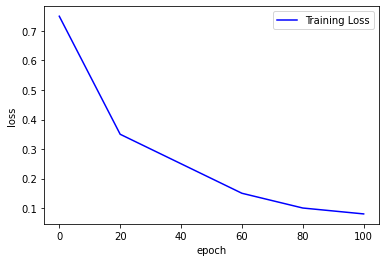

In [9]:
p = Plot();
p.plot(Epoch,loss)